In [1]:
# Author:Zhang Yuan
from MyPackage import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# ------------------------------------------------------------
__mypath__ = MyPath.MyClass_Path("")  # 路径类
mylogging = MyDefault.MyClass_Default_Logging(activate=False)  # 日志记录类，需要放在上面才行
myfile = MyFile.MyClass_File()  # 文件操作类
myword = MyFile.MyClass_Word()  # word生成类
myexcel = MyFile.MyClass_Excel()  # excel生成类
myini = MyFile.MyClass_INI()  # ini文件操作类
mytime = MyTime.MyClass_Time()  # 时间类
myparallel = MyTools.MyClass_ParallelCal()  # 并行运算类
myplt = MyPlot.MyClass_Plot()  # 直接绘图类(单个图窗)
mypltpro = MyPlot.MyClass_PlotPro()  # Plot高级图系列
myfig = MyPlot.MyClass_Figure(AddFigure=False)  # 对象式绘图类(可多个图窗)
myfigpro = MyPlot.MyClass_FigurePro(AddFigure=False)  # Figure高级图系列
mynp = MyArray.MyClass_NumPy()  # 多维数组类(整合Numpy)
mypd = MyArray.MyClass_Pandas()  # 矩阵数组类(整合Pandas)
mypdpro = MyArray.MyClass_PandasPro()  # 高级矩阵数组类
myDA = MyDataAnalysis.MyClass_DataAnalysis()  # 数据分析类
myDefault = MyDefault.MyClass_Default_Matplotlib()  # 画图恢复默认设置类
# myMql = MyMql.MyClass_MqlBackups() # Mql备份类
# myBaidu = MyWebCrawler.MyClass_BaiduPan() # Baidu网盘交互类
# myImage = MyImage.MyClass_ImageProcess()  # 图片处理类
myBT = MyBackTest.MyClass_BackTestEvent()  # 事件驱动型回测类
myBTV = MyBackTest.MyClass_BackTestVector()  # 向量型回测类
myML = MyMachineLearning.MyClass_MachineLearning()  # 机器学习综合类
mySQL = MyDataBase.MyClass_MySQL(connect=False)  # MySQL类
mySQLAPP = MyDataBase.MyClass_SQL_APPIntegration()  # 数据库应用整合
myWebQD = MyWebCrawler.MyClass_QuotesDownload(tushare=False)  # 金融行情下载类
myWebR = MyWebCrawler.MyClass_Requests()  # Requests爬虫类
myWebS = MyWebCrawler.MyClass_Selenium(openChrome=False)  # Selenium模拟浏览器类
myWebAPP = MyWebCrawler.MyClass_Web_APPIntegration()  # 爬虫整合应用类
myEmail = MyWebCrawler.MyClass_Email()  # 邮箱交互类
myReportA = MyQuant.MyClass_ReportAnalysis()  # 研报分析类
myFactorD = MyQuant.MyClass_Factor_Detection()  # 因子检测类
myKeras = MyDeepLearning.MyClass_tfKeras()  # tfKeras综合类
myTensor = MyDeepLearning.MyClass_TensorFlow()  # Tensorflow综合类
myMT5 = MyMql.MyClass_ConnectMT5(connect=False)  # Python链接MetaTrader5客户端类
myMT5Pro = MyMql.MyClass_ConnectMT5Pro(connect=False)  # Python链接MT5高级类
myMT5Indi = MyMql.MyClass_MT5Indicator()  # MT5指标Python版
myMT5Report = MyMql.MyClass_StratTestReport(AddFigure=False)  # MT5策略报告类
myMT5Lots_Fix = MyMql.MyClass_Lots_FixedLever(connect=False)  # 固定杠杆仓位类
myMT5Lots_Dy = MyMql.MyClass_Lots_DyLever(connect=False)  # 浮动杠杆仓位类
myMT5run = MyMql.MyClass_RunningMT5()  # Python运行MT5
myMT5code = MyMql.MyClass_CodeMql5()  # Python生成MT5代码
myMoneyM = MyTrade.MyClass_MoneyManage()  # 资金管理类
# myDefault.set_backend_default("Pycharm")  # Pycharm下需要plt.show()才显示图
# ------------------------------------------------------------
# 弹出窗显示必须加上：%matplotlib auto
# 控制台显示必须加上：%matplotlib inline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
symbol_list =['EURUSD','GBPUSD','AUDUSD','NZDUSD','USDJPY','USDCAD','USDCHF','XAUUSD','XAGUSD'] # myMT5Pro.get_main_symbol_name_list()
timeframe_list = ["TIMEFRAME_D1","TIMEFRAME_H12","TIMEFRAME_H8","TIMEFRAME_H6",
                  "TIMEFRAME_H4","TIMEFRAME_H3","TIMEFRAME_H2","TIMEFRAME_H1",
                  "TIMEFRAME_M30","TIMEFRAME_M20","TIMEFRAME_M15","TIMEFRAME_M12",
                  "TIMEFRAME_M10","TIMEFRAME_M6","TIMEFRAME_M5","TIMEFRAME_M4",
                  "TIMEFRAME_M3","TIMEFRAME_M2","TIMEFRAME_M1"]
symbol = "EURUSD"
timeframe = "TIMEFRAME_D1"
date_from, date_to = myMT5Pro.get_date_range(timeframe)
data_total = myMT5Pro.getsymboldata(symbol, timeframe, date_from, date_to, index_time=True, col_capitalize=True)
data_train, data_test = myMT5Pro.get_train_test(data_total, train_scale=0.8)


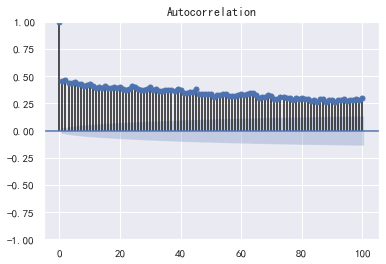

In [5]:
# ---波动率分析
data_vola = data_total["Range"] # 只有range波动才有自相关性，且周期为D1
# data_vola = myMT5Indi.ATR(data_total, InpAtrPeriod=1)
# data_vola = data_total["Close"] - data_total["Open"]
# data_vola = np.power(data_vola,2)
# 自相关性分析
# myDA.tsa_auto_test(data_range)
# acf = myDA.tsa.tsa_acf(data_range, nlags=60)
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True)

# 偏相关性
# myDA.tsa.tsa_pacf(data_vola,nlags=100,plot=True)

# ---序列自相关系数分析：1期波动与其滞后的相关系数曲线
# myDA.tsa.plot_selfcorrelation(data_vola,count=100)